In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import: unable to open X server `' @ error/import.c/ImportImageCommand/347.
import: unable to open X server `' @ error/import.c/ImportImageCommand/347.
import: unable to open X server `' @ error/import.c/ImportImageCommand/347.
import: unable to open X server `' @ error/import.c/ImportImageCommand/347.
bash: from: command not found
bash: from: command not found
bash: from: command not found
bash: from: command not found
bash: from: command not found
bash: from: command not found
bash: from: command not found
bash: from: command not found


: 127

In [263]:
df = pd.read_csv("Dilute_Solute_Diffusion_with_features.csv")

In [264]:
df.shape

(408, 29)

In [265]:
df.columns

Index(['Material compositions 1', 'Material compositions 2', 'Enorm (eV)',
       'E_raw (eV)', 'Site2_MeltingT', 'Site1_MendeleevNumber',
       'Site1_MiracleRadius', 'GSestFCClatcnt_max_value', 'Site2_BCCenergy_pa',
       'Site1_BCCfermi', 'CovalentRadius_max_value', 'Site2_Density',
       'n_ws^third_min_value', 'Site1_HHIr', 'IonicRadii_max_value',
       'BoilingT_max_value', 'valence_arithmetic_average', 'Site2_NdUnfilled',
       'Site1_IonicRadii', 'BCCenergy_pa_composition_average',
       'MiracleRadius_min_value', 'MeltingT_min_value', 'NUnfilled_max_value',
       'Site2_Group', 'Site1_CovalentRadii', 'Site2_NUnfilled',
       'SpecificHeatCapacity_difference', 'Site1_Electronegativity',
       'BCCenergy_pa_arithmetic_average'],
      dtype='object')

In [266]:
df_encoded = pd.get_dummies(df, columns=['Material compositions 1', 'Material compositions 2'])

In [267]:
# Separating features (X) and target variable (y)
X = df_encoded.drop(['E_raw (eV)','Enorm (eV)'], axis=1)

y = df_encoded['E_raw (eV)']

In [ ]:
df = df.drop(['Material compositions 1', 'Material compositions 2'])

In [ ]:
sns.heatmap(df[['E_raw (eV)']].sort_values(by=['E_raw (eV)'], ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

plt.title('Heatmap of E_raw (eV)')
plt.show(

In [268]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [269]:
# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

Text(18, 0.8904818879841682, 'Elbow Point (13, 0.91)')

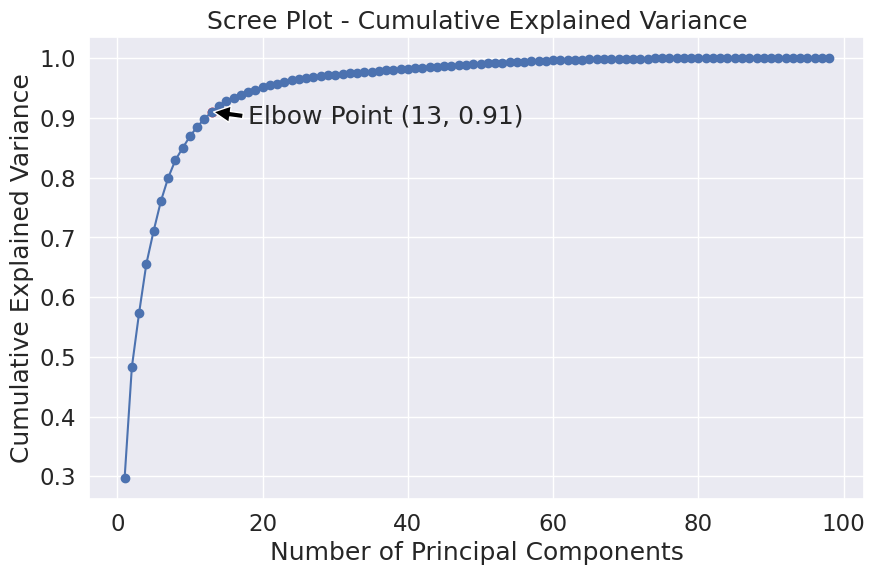

In [270]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.title('Scree Plot - Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Find the elbow point (where the rate of increase slows down)
diff = np.diff(cumulative_explained_variance)
elbow_point = np.argmax(diff < 0.01) + 1  # You can adjust the threshold

# Corrected elbow point calculation
elbow_point = np.where(diff < 0.01)[0][0] + 1

# Highlight the elbow point on the plot with annotation
plt.scatter(elbow_point, cumulative_explained_variance[elbow_point - 1], c='red', label='Elbow Point')
plt.annotate(f'Elbow Point ({elbow_point}, {cumulative_explained_variance[elbow_point - 1]:.2f})',
             xy=(elbow_point, cumulative_explained_variance[elbow_point - 1]),
             xytext=(elbow_point + 5, cumulative_explained_variance[elbow_point - 1] - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

Text(0, 0.5, 'Principal Component 2')

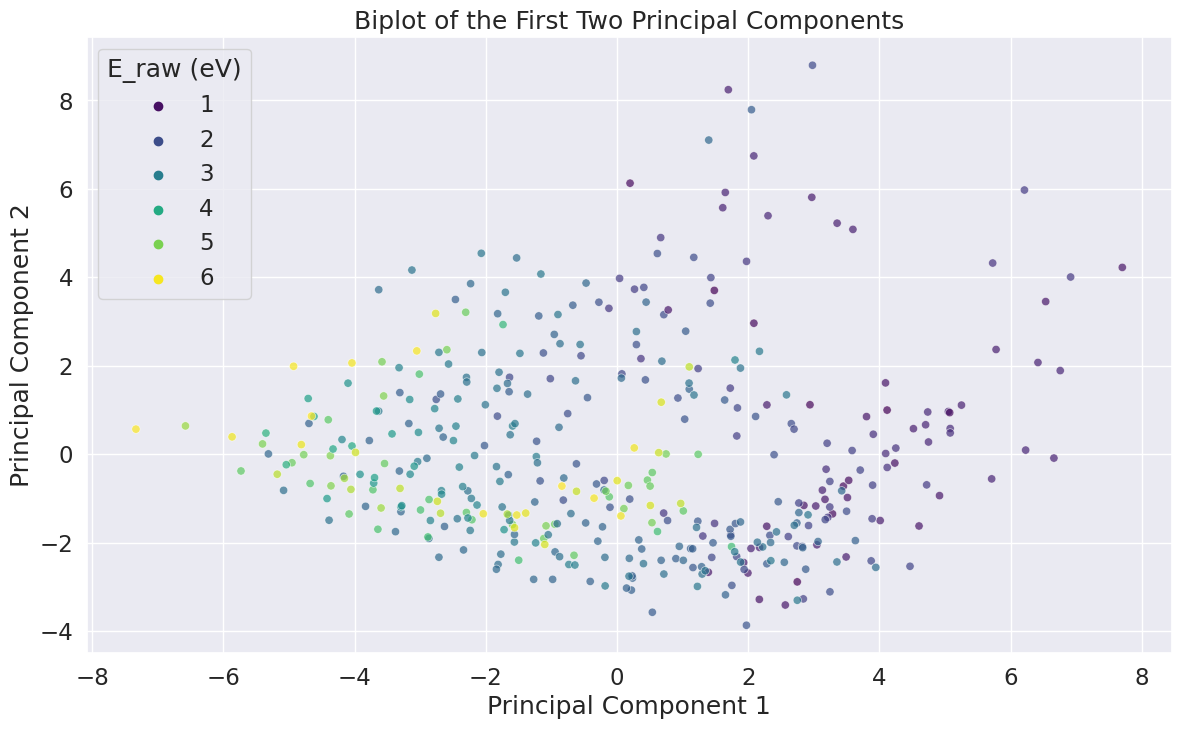

In [271]:
# Biplot
plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", alpha=0.7)
plt.title('Biplot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

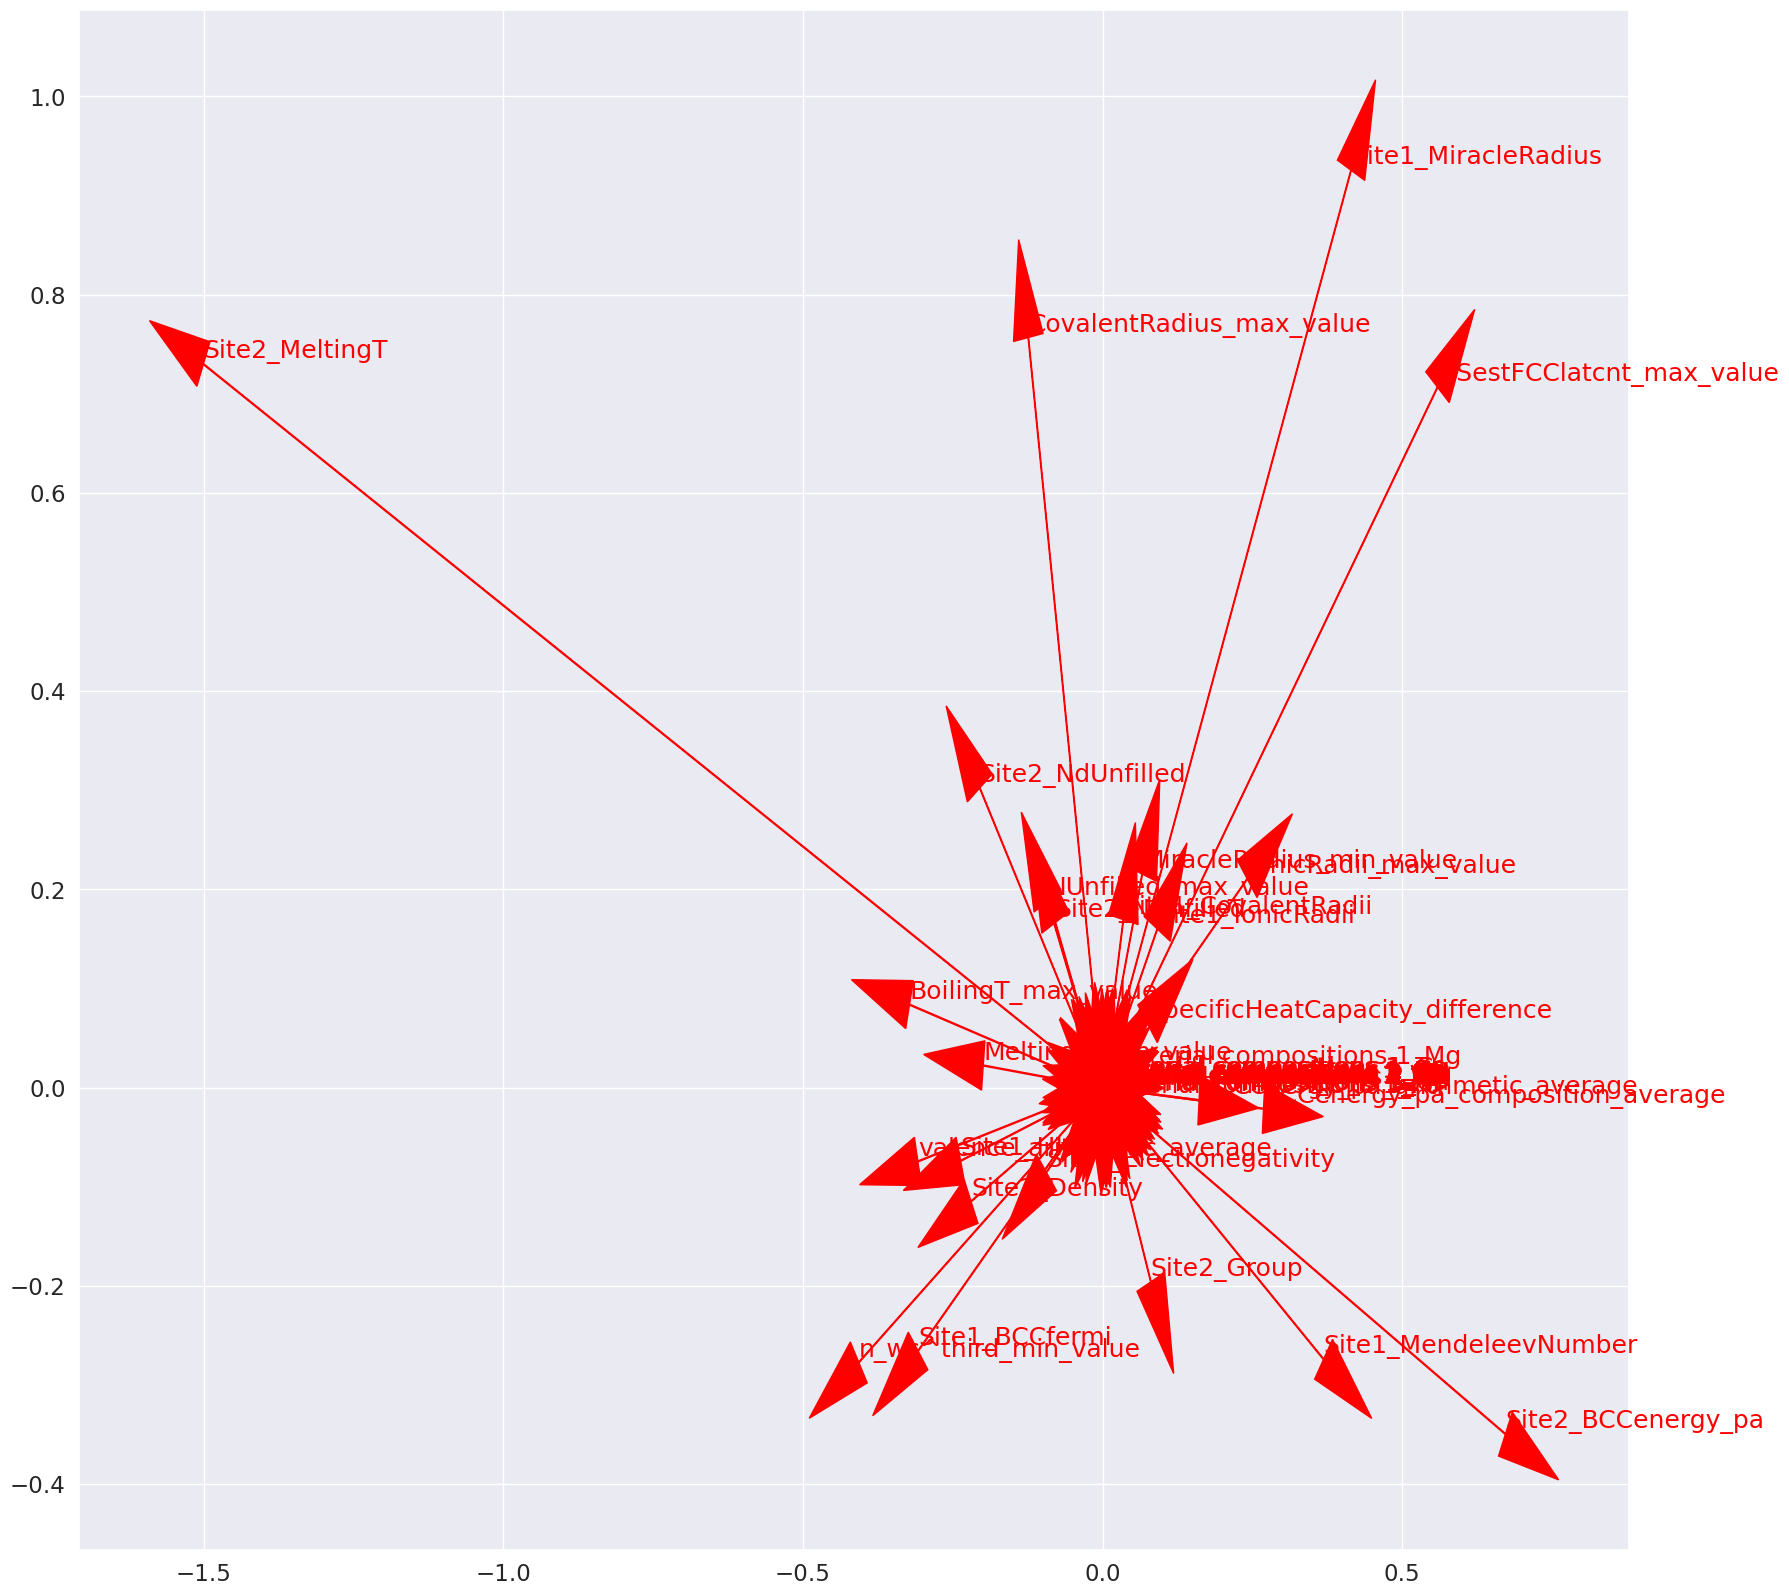

In [272]:
# Add feature vectors as arrows
plt.figure(figsize=(20, 20))
feature_vectors = pca.components_.T
for i, (vec, var) in enumerate(zip(feature_vectors, pca.explained_variance_)):
    arrow_size = 2 * np.sqrt(var)
    plt.arrow(0, 0, arrow_size * vec[0], arrow_size * vec[1], head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(arrow_size * vec[0], arrow_size * vec[1], X.columns[i], color='red', ha='left', va='bottom')

plt.show()

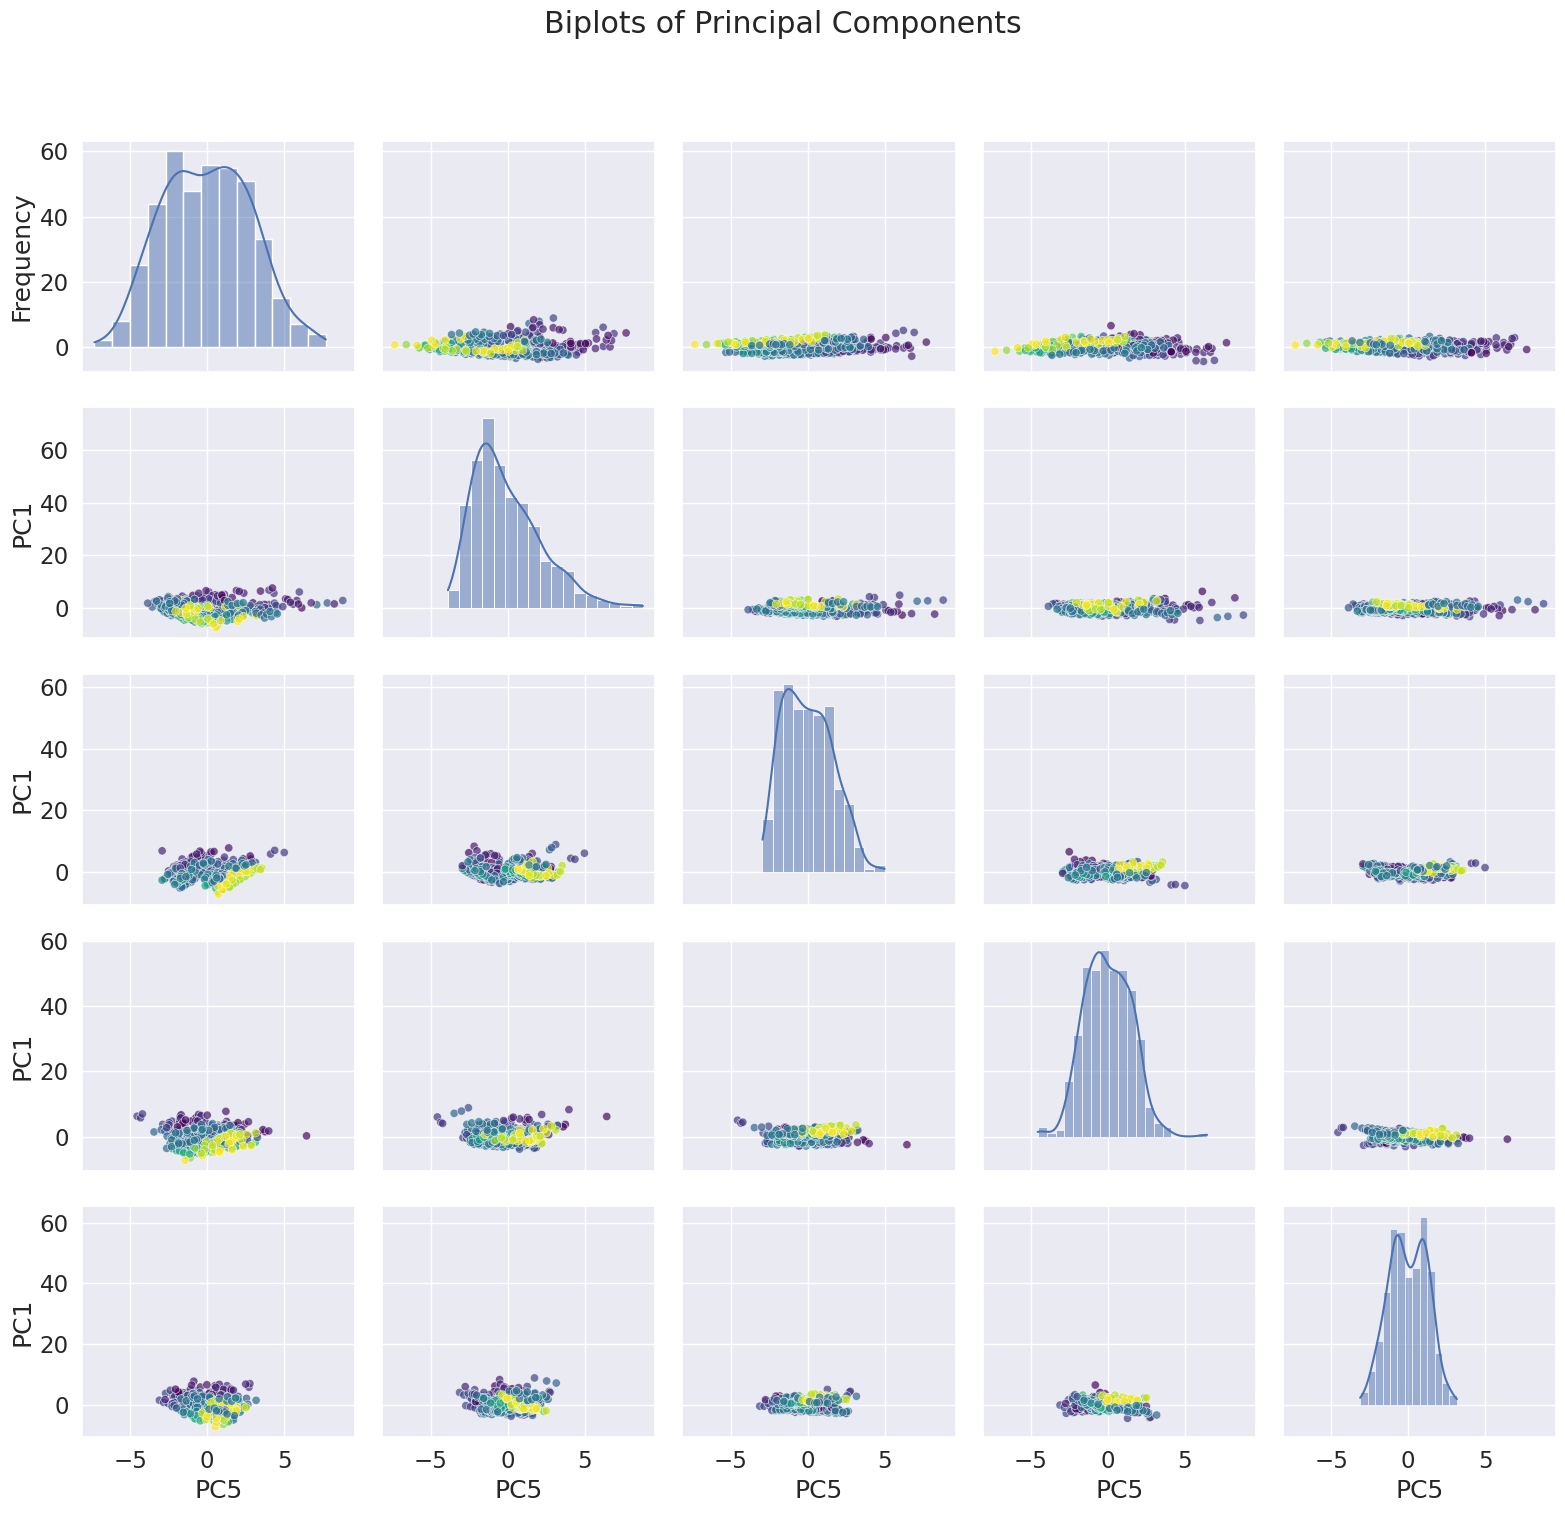

In [273]:
# Limit the number of principal components to visualize
num_components_to_visualize = min(5, X_pca.shape[1])

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_components_to_visualize, ncols=num_components_to_visualize, figsize=(16, 16), sharex='col', sharey='row')

# Use the flat attribute to iterate over the axes
axes_flat = axes.flat

# Iterate through each pair of principal components
for i in range(num_components_to_visualize):
    for j in range(num_components_to_visualize):
        ax = next(axes_flat)

        if i == j:
            # If the same component, plot a histogram
            sns.histplot(X_pca[:, i], kde=True, ax=ax)
            ax.set_ylabel('Frequency')
            ax.set_xlabel(f'PC{i + 1}')
        else:
            # If different components, plot a scatter plot
            sns.scatterplot(x=X_pca[:, i], y=X_pca[:, j], hue=y, palette="viridis", alpha=0.7, ax=ax)
            ax.set_xlabel(f'PC{i + 1}')
            ax.set_ylabel(f'PC{j + 1}')
            ax.legend().set_visible(False)

plt.suptitle('Biplots of Principal Components')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [274]:
n_components = elbow_point
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [275]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [276]:
# Create a linear regression model
model = LinearRegression()

In [277]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [278]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [279]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.3162854235169201
R-squared: 0.8057974477969514


In [280]:
# Get the names of the original features
feature_names = X.columns

# Get the loadings for each principal component
loadings = pca.components_

# Create a DataFrame to store the features and their loadings for each principal component
features_df = pd.DataFrame(loadings, columns=feature_names)

# Print the features for each principal component
for i in range(n_components):
    print(f"Features for Principal Component {i+1}:")
    print(features_df.iloc[i].sort_values(ascending=False))
    print()

Features for Principal Component 1:
BCCenergy_pa_arithmetic_average     0.333272
BCCenergy_pa_composition_average    0.333272
Site2_BCCenergy_pa                  0.276078
GSestFCClatcnt_max_value            0.187853
IonicRadii_max_value                0.183698
                                      ...   
Site2_MeltingT                     -0.265249
BoilingT_max_value                 -0.269469
valence_arithmetic_average         -0.272438
n_ws^third_min_value               -0.275100
MeltingT_min_value                 -0.288610
Name: 0, Length: 98, dtype: float64

Features for Principal Component 2:
CovalentRadius_max_value    0.369222
MiracleRadius_min_value     0.297053
Site1_MiracleRadius         0.295383
Site2_NUnfilled             0.293174
Site2_NdUnfilled            0.291292
                              ...   
Site1_BCCfermi             -0.114626
Site2_BCCenergy_pa         -0.143519
Site1_Electronegativity    -0.158997
n_ws^third_min_value       -0.187505
Site2_Group               

In [281]:
# Get the loadings for each principal component
loadings = pca.components_

# Create a DataFrame to store features and their loadings
loadings_df = pd.DataFrame(loadings, columns=feature_names)

# Calculate the feature importances by taking the absolute values of the loadings and summing across principal components
feature_importances = np.abs(loadings).sum(axis=0)

# Create a DataFrame to store features and their importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by the importances in descending order
importances_df = importances_df.reindex(importances_df['Importance'].abs().sort_values(ascending=False).index)

# Print the most significant features
print("Most Significant Features based on PCA:")
print(importances_df.head(10))

Most Significant Features based on PCA:
                            Feature  Importance
5                    Site1_BCCfermi    2.649381
16          MiracleRadius_min_value    2.645208
22  SpecificHeatCapacity_difference    2.585641
12       valence_arithmetic_average    2.403571
10             IonicRadii_max_value    2.397523
9                        Site1_HHIr    2.360337
14                 Site1_IonicRadii    2.352765
7                     Site2_Density    2.328336
23          Site1_Electronegativity    2.255764
19                      Site2_Group    2.202363


In [282]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [283]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [284]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [285]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.14018615006538104
R-squared: 0.9139242402526965


In [286]:
svr_model = SVR()

In [287]:
# Train the model
svr_model.fit(X_train, y_train)

SVR()

In [288]:
# Make predictions on the test set
y_pred = svr_model.predict(X_test)

In [289]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.10830954403893457
R-squared: 0.9334968091591981
